In [ ]:
pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 10.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth

import time
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
client_id = '###'
client_secret = '###'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
def get_track_ids_for_playlist(playlist_id):
    track_ids = set()  # Using a set to automatically handle duplicates
    playlist = sp.playlist(playlist_id)

    while playlist:
        for item in playlist['tracks']['items']:
            track = item['track']
            if track['id'] not in track_ids:
                track_ids.add(track['id'])

        if playlist['tracks']['next']:
            playlist['tracks'] = sp.next(playlist['tracks'])
        else:
            break

    return list(track_ids)

# List of playlist IDs
playlist_ids = [
    '37i9dQZF1DX1s9knjP51Oa',  # Calm Vibes
    '37i9dQZF1DX4sWSpwq3LiO',  # Peaceful Piano
    '37i9dQZF1DX8Sz1gsYZdwj',  # Classical Sleep
    '37i9dQZF1DWURCUKHUKWCX',  # Atmospheric Piano
    '37i9dQZF1DX9sIqqvKsjG8',  # Instrumental Study
    '37i9dQZF1DX7K31D69s4M1',  # Piano in the Background
    '37i9dQZF1DX03b46zi3S82',  # Sleepy Piano
    '37i9dQZF1DWZrc3lwvImLj'   # Melancholy Instrumentals
]
all_track_ids = []
for playlist_id in playlist_ids:
    track_ids = get_track_ids_for_playlist(playlist_id)
    all_track_ids.extend(track_ids)

#重複しているIDは削除する。=データフレーム形式に変換が必要→またリストに戻す。
df_all_track_ids = pd.DataFrame(all_track_ids, columns=['track_id'])
df_all_track_ids.drop_duplicates (subset=['track_id'], inplace=True)

track_ids = df_all_track_ids['track_id'].values.tolist()

# Output the results
print(len(track_ids))
print(track_ids)


1225
['64ovZi9kM3UqPSPgGYaf5l', '6fjZ39b5dT9uZzFsVRLwSi', '4Xj97H1nAC77849DA1Psle', '3KuHx15ro3TkRZTi5g261x', '6CWzmoxDJJdIJ5GImw0RHv', '31euvr3EhfWo8GbsVVsQjy', '2zVMhbaUO3mBXZ16YFtOoP', '21qsu8rj7gvICuv0P6ZzsW', '67ntAUXUgYdO3YUt04zk5E', '6fHq66kBS2OJiWu3ZGNZj9', '3i1rbYtU8ktIHUIKH1pLKY', '0QzBw7xBO5q6plc8hX5z7B', '6Dn5BgAw5vgo6R5z9U6nEl', '01hiTwznescgIbY9PAUVUz', '1ZLB65RUVj9ahQZ1OV9I8H', '2ssG2QnW8tai39jGqJxbW1', '79QWY71xWy96RCEZK720en', '0X3mDFl8poPzyNQmrTe9fr', '4fGktu4RYSYuF05at1ToLu', '64HEaiLP9VcrJpElxywgRr', '2TZetlpje1UuPbMU2heuMR', '1UY1Fr1IExkpYxxxxUWFug', '2vcdqUMFMbKYvqzBYsVZDn', '36J08RU5mlBaKPcNdkxLoa', '0gICIHDApco8NkbEYfEJWo', '0Y8MBkgAK872pVX48wWpL5', '391l8re8aew1rvyNOXUYDD', '3JSPIgK4QMCTSEXZCMRuPj', '2oafUifmaR1uBS3o9o7uLO', '0kQMah3gWs9amKOblNUdx7', '5vC5C7G92VJ4s9lXqtOXKY', '0SGBSwX49QWTGiXMu39mUz', '4od4sgAzoqR9y3ybPnnmrV', '47Dbe09uprsTUFezKfy594', '0ibKzzyo527y98eTHe7Ktg', '2kgwWNOn9IUCoQuJIReVUH', '7uVYkqXcq6qeUuzIRWUUSS', '0j0OGX7ApByJrAWJTXdZpR', '5ZX0E

In [ ]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)
  #idが情報を持っていない場合、実行をスキップする

  #if構文を入れる（trackが削除されている場合を想定する）
  if features[0] is None:
    return ''
  else:
    track_id = meta["id"]
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    key = features[0]['key']
    mode = features[0]['mode']
    danceability = features[0]['danceability']
    acousticness = features[0]['acousticness']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']

    track = [track_id, name, album, artist, release_date, length, popularity, key, mode, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
    return track

tracks = []
for track_id in track_ids:
  time.sleep(0.5)
  track = getTrackFeatures(track_id)

  if track != '':
    tracks.append(track)

df = pd.DataFrame(tracks, columns = ['track_id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
df1 = df.assign(name_number=0)
df1.head()
#あとで出力するときに'track_id'が必要

,track_id,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,name_number
0,64ovZi9kM3UqPSPgGYaf5l,Dahlia,Dahlia,Alfred Janders,2023-12-01,175163,47,7,1,0.521,0.996,0.0190,0.839,0.123,-26.071,0.0392,85.542,3,0.332,0
1,6fjZ39b5dT9uZzFsVRLwSi,Calm Wind,Calm Wind,Elfrieda,2023-06-09,140102,60,0,1,0.461,0.995,0.0286,0.986,0.116,-25.117,0.0482,113.851,4,0.471,0
2,4Xj97H1nAC77849DA1Psle,January Sky,January Sky,Oscar Legrand,2022-12-30,129000,40,0,1,0.368,0.949,0.0571,0.903,0.101,-21.341,0.0431,116.560,3,0.582,0
3,3KuHx15ro3TkRZTi5g261x,Zu Hause,Zu Hause,Elias Kiefer,2022-12-09,127000,40,3,1,0.527,0.993,0.1300,0.879,0.118,-27.654,0.0422,111.228,4,0.663,0
4,6CWzmoxDJJdIJ5GImw0RHv,Hearts of Desire,Hearts of Desire,Cole Neumann,2023-11-03,139312,64,5,1,0.327,0.988,0.0145,0.925,0.107,-29.432,0.0416,143.642,4,0.126,0


In [ ]:
playlist_ids = ['###']


all_track_ids = []

for playlist_id in playlist_ids:
    track_ids = get_track_ids_for_playlist(playlist_id)
    all_track_ids.extend(track_ids)

#重複しているIDは削除する。=データフレーム形式に変換が必要→またリストに戻す。
df_all_track_ids = pd.DataFrame(all_track_ids, columns=['track_id'])
df_all_track_ids.drop_duplicates (subset=['track_id'], inplace=True)

df_list = df_all_track_ids['track_id'].values.tolist()


print(len(df_list))
print(df_list)

28
['6gi5zmdu3FHDzwK9OXNAXq', '6CFpkOa1vJiAMtKiFON3dZ', '6bf1NLCK3QmUE7KGMl1Nih', '5MNEnDe3RItehKqsBMxApt', '1ufMHClB3dXwbYXqS0IwPC', '4J1RXpJVjFjUatHPuAIipu', '7EYqha5R0Pty8onSGBHmxB', '1oGTCgHtfMtntMG88l2nii', '1OFiIpCWktByeDCBIfNNAl', '1wPQiFJB11NoYXQNVQ7hrg', '5RT9xG1UEDaM48HyqGaZJS', '7ssdwqAA5Pk5AwbpstlMWi', '2wPZz3bU0sdvW0I5mP9LNZ', '5thHu6dTknfij6M9ZQWy1n', '0dZqFmCZpcUXnbHTVGPOB5', '4fydLPUpvmzST7EyJVpBaC', '6cM8EXEGMx5F9gohfE3ji1', '3Q8inmKvK1uSsOzuuR9WB2', '5bztTzKcpoJsS5UZtvFY2c', '2YVtMf9JE8NgTILjfZZrEY', '3iYTfQeLb6YkJkfLJl1bMr', '44WPUG1RgNbJlEt8UHs1Da', '6tq84d7zjY7MzL07aMQT8G', '2mUnx6LJY8p5Fbe3IRXffw', '04cJzEcakQA1SSldJCGWUv', '43Xz2HbMhIF2vojIHJLxZh', '7KxHTy8kwBYCWEb6WrXxNc', '05QIc2wIs6LOSbgDppX32W']


In [ ]:
tracks = []
for track_id in track_ids:
  time.sleep(0.5)
  track = getTrackFeatures(track_id)

  if track != '':
    tracks.append(track)

df3 = pd.DataFrame(tracks, columns = ['track_id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
df4 = df3.assign(name_number=1)
df4.head()

,track_id,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,name_number
0,6gi5zmdu3FHDzwK9OXNAXq,Tremolo,Tremolo,Tatsuhiro Miyazawa,2024-08-09,178526,12,1,1,0.388,0.994,0.0317,0.920,0.0905,-32.573,0.0357,133.102,4,0.103,1
1,6CFpkOa1vJiAMtKiFON3dZ,Warbler,Warbler,Tatsuhiro Miyazawa,2024-05-17,188000,0,4,0,0.472,0.976,0.0649,0.953,0.1080,-33.020,0.0427,146.583,4,0.177,1
2,6bf1NLCK3QmUE7KGMl1Nih,Epilogue,Epilogue,Tatsuhiro Miyazawa,2024-04-26,188750,0,7,1,0.401,0.982,0.0933,0.959,0.1050,-30.977,0.0314,71.676,3,0.225,1
3,5MNEnDe3RItehKqsBMxApt,Memory,Memory,Tatsuhiro Miyazawa,2024-03-08,196500,0,4,0,0.475,0.995,0.0573,0.932,0.0872,-28.605,0.0507,75.861,4,0.122,1
4,1ufMHClB3dXwbYXqS0IwPC,Crystal,Crystal,Tatsuhiro Miyazawa,2024-02-23,202498,0,1,1,0.425,0.994,0.0331,0.956,0.1120,-30.627,0.0407,76.338,4,0.224,1


In [ ]:
df5 = pd.concat([df4, df1], ignore_index=True)
df6 = df5.drop(columns = ['name','track_id', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'loudness', 'tempo', 'time_signature', 'valence','name_number'])
df5.head()

,track_id,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,name_number
0,6gi5zmdu3FHDzwK9OXNAXq,Tremolo,Tremolo,Tatsuhiro Miyazawa,2024-08-09,178526,12,1,1,0.388,0.994,0.0317,0.920,0.0905,-32.573,0.0357,133.102,4,0.103,1
1,6CFpkOa1vJiAMtKiFON3dZ,Warbler,Warbler,Tatsuhiro Miyazawa,2024-05-17,188000,0,4,0,0.472,0.976,0.0649,0.953,0.1080,-33.020,0.0427,146.583,4,0.177,1
2,6bf1NLCK3QmUE7KGMl1Nih,Epilogue,Epilogue,Tatsuhiro Miyazawa,2024-04-26,188750,0,7,1,0.401,0.982,0.0933,0.959,0.1050,-30.977,0.0314,71.676,3,0.225,1
3,5MNEnDe3RItehKqsBMxApt,Memory,Memory,Tatsuhiro Miyazawa,2024-03-08,196500,0,4,0,0.475,0.995,0.0573,0.932,0.0872,-28.605,0.0507,75.861,4,0.122,1
4,1ufMHClB3dXwbYXqS0IwPC,Crystal,Crystal,Tatsuhiro Miyazawa,2024-02-23,202498,0,1,1,0.425,0.994,0.0331,0.956,0.1120,-30.627,0.0407,76.338,4,0.224,1


In [ ]:
scaler=StandardScaler()
scaler.fit(df6)

StandardScaler()

In [ ]:
scaled_data=scaler.transform(df6)

In [ ]:
scaled_data

array([[-2.57635537e-02,  5.24067167e-01, -1.80290449e-01,
        -1.38736087e-01, -8.66256864e-01, -4.35666489e-01],
       [ 8.92818632e-01, -1.60069777e+00,  7.16122263e-01,
         7.78976122e-01,  1.04480966e-01, -6.44472540e-02],
       [ 1.16397975e-01, -8.92442792e-01,  1.48293314e+00,
         9.45832887e-01, -6.19312334e-02, -6.63701162e-01],
       ...,
       [-8.02184211e-01,  1.69939677e-01, -7.36498337e-01,
         3.11216988e-04, -2.28343433e-01, -5.38409901e-02],
       [ 8.16270117e-01,  5.24067167e-01,  1.30743065e+00,
        -1.66545548e-01, -1.21572248e+00, -5.04607204e-01],
       [-9.13765670e-02, -1.24657028e+00, -5.23195312e-01,
         6.67738278e-01, -5.83356125e-01, -4.94000940e-01]])

In [ ]:
pca = PCA(n_components = 3)
pca.fit(scaled_data)

print('主成分：', pca.components_.round(3))
print('平均：', pca.mean_.round(3))
print('分散：', pca.explained_variance_.round(3))
print('共分散：', pca.get_covariance().round(3))
print('寄与率：', pca.explained_variance_ratio_.round(3))
print('累積寄与率：', np.cumsum(pca.explained_variance_ratio_).round(3))

主成分： [[ 0.451  0.55  -0.367  0.43  -0.032  0.416]
 [ 0.488 -0.335  0.697  0.352  0.104  0.171]
 [-0.108 -0.142 -0.209  0.106  0.952  0.086]]
平均： [ 0. -0. -0. -0. -0. -0.]
分散： [1.525 1.093 1.019]
共分散： [[ 1.014  0.136 -0.013  0.192 -0.019  0.161]
 [ 0.136  1.05  -0.212  0.135 -0.055  0.148]
 [-0.013 -0.212  1.046 -0.047 -0.015 -0.08 ]
 [ 0.192  0.135 -0.047  0.966  0.024  0.152]
 [-0.019 -0.055 -0.015  0.024  1.002  0.014]
 [ 0.161  0.148 -0.08   0.152  0.014  0.927]]
寄与率： [0.254 0.182 0.17 ]
累積寄与率： [0.254 0.436 0.606]


In [ ]:
#累積寄与率（２）がほぼ５０％未満←改良の余地あり。
x_pca=pca.transform(scaled_data)

In [ ]:
x_pca.shape

(1251, 3)

In [ ]:
scaled_data.shape

(1251, 6)

In [ ]:
df1.shape

(1223, 20)

In [ ]:
x_pca

array([[ 0.12988064, -0.52736155, -0.91038492],
       [-0.43529502,  1.74500939,  0.15741992],
       [-0.84988168,  1.60178872, -0.21147137],
       ...,
       [-0.01314481, -0.99432427, -0.00501263],
       [-0.06549203,  0.86191997, -1.65431773],
       [-0.43413203,  0.09839932, -0.23011985]])

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarni

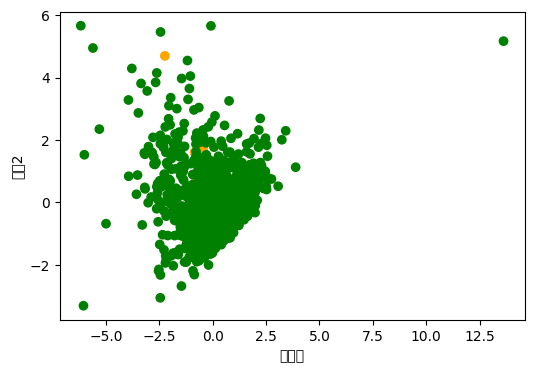

In [ ]:
#絶対的な（≠ある曲に対して相対的）曲データの散らばり具合を把握。

plt.figure(figsize=(6, 4))

#自曲はオレンジ、他曲は緑 from df6
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=['orange' if label == 1 else 'green' for label in df5['name_number']])

plt.xlabel('成分１')
plt.ylabel('成分2')
plt.show

In [ ]:
s = pd.DataFrame(data=x_pca, columns=['成分１', '成分２','成分3'], dtype=float)
df7 = pd.concat([df6,s],axis=1)
df7.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,成分１,成分２,成分3
0,0.388,0.994,0.0317,0.920,0.0905,0.0357,0.129881,-0.527362,-0.910385
1,0.472,0.976,0.0649,0.953,0.1080,0.0427,-0.435295,1.745009,0.157420
2,0.401,0.982,0.0933,0.959,0.1050,0.0314,-0.849882,1.601789,-0.211471
3,0.475,0.995,0.0573,0.932,0.0872,0.0507,0.850873,0.613865,-1.245724
4,0.425,0.994,0.0331,0.956,0.1120,0.0407,0.800930,0.218863,0.301586


In [ ]:
#相対的な座標（成分１',成分２’,成分３’）を設ける
P = x_pca

# 対象曲
A = df7.iloc[0][['成分１', '成分２', '成分3']].values

# 各点と A との相対距離を計算
relative_distances = np.linalg.norm(P - A, axis=1)
df7['近似度'] = relative_distances
#近似度順に並び替え
df8 =df7.sort_values(by='近似度')
df8['track_id'] = df5['track_id']
df8['name'] = df5['name']
df8['album'] = df5['album']
df8['artist'] = df5['artist']
#上から２０番目まで表示。
df8 = df8.iloc[:20]
df8.head(20)

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,成分１,成分２,成分3,近似度,track_id,name,album,artist
0,0.388,0.994,0.0317,0.920,0.0905,0.0357,0.129881,-0.527362,-0.910385,0.000000,6gi5zmdu3FHDzwK9OXNAXq,Tremolo,Tremolo,Tatsuhiro Miyazawa
956,0.295,0.995,0.0431,0.946,0.0896,0.0403,0.036851,-0.557379,-0.831352,0.125704,2ntaF4Q9b2yePJ3NICBnVs,The Destination,The Destination,Keane Wang
196,0.478,0.992,0.0208,0.879,0.0920,0.0446,0.255569,-0.485272,-0.923170,0.133163,3nb0mXvI0kiyo4dQUZx1Tj,Fjord,Fjord,Eyøni
866,0.392,0.989,0.0205,0.926,0.0900,0.0363,0.021960,-0.457626,-0.773952,0.187414,2YBz1rKIDo0VCY1y7n76sC,The Last Days Of Summer,The Last Days Of Summer,Ima Rayner
286,0.473,0.994,0.0279,0.894,0.0973,0.0284,0.102850,-0.427131,-0.740420,0.199160,5qowE02tRUQqFf3uTC8tgs,Elegie,Elegie,Kiara Leonard
51,0.304,0.988,0.0269,0.942,0.0870,0.0526,0.015618,-0.479717,-0.726283,0.221855,36J08RU5mlBaKPcNdkxLoa,closer,closer,Aisen Voight
436,0.309,0.988,0.0278,0.952,0.0810,0.0430,-0.050027,-0.459977,-1.068136,0.248582,17xaw9sDx8gyw1ZAOUb1Ns,When Orange is the Sky,When Orange is the Sky,Fabrizio Paterlini
1175,0.414,0.995,0.0236,0.893,0.0932,0.0394,0.157241,-0.795903,-0.832456,0.280956,59laLvebJc2o98AFIgduKq,In The Old Library,In The Old Library,Housman
661,0.421,0.993,0.0290,0.912,0.0972,0.0324,0.074089,-0.432230,-0.602309,0.327221,0CtYYa8anV9WcP4R7WEP6c,Secret Meadow,Secret Meadow,Cole Neumann
587,0.414,0.994,0.0299,0.915,0.0880,0.0443,0.410468,-0.407705,-1.038737,0.330940,0DFAkAHNm5XxqEEYkFbHcI,a joyful life,a joyful life,Jonas Hoffmann


In [ ]:
os.environ["SPOTIPY_CLIENT_ID"] = '###'
os.environ["SPOTIPY_CLIENT_SECRET"] = '###'
os.environ["SPOTIPY_REDIRECT_URI"] = "https://localhost:8888/callback"

In [ ]:
username = '###'
scope = "user-library-read user-read-playback-state playlist-read-private user-read-recently-played playlist-read-collaborative playlist-modify-public playlist-modify-private"
playlist = '###'
playlist_id = '###'
snapshot_id = "AAAFvrkNGXP2RzfNscoLoDGFnlCdCTuk"
Track_ids = df8['track_id']

spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(open_browser=False, scope=scope))

# プレイリストの曲全削除
tracks_json = spotify.playlist_items(playlist_id)
track_items = tracks_json["items"]
tracks = [track_item["track"]["id"] for track_item in track_items if track_item["track"] is not None]
spotify.playlist_remove_all_occurrences_of_items(playlist_id, tracks)

{'snapshot_id': 'AAAF7plkS8f3aLEqCxiPonjzTNi1hRdx'}

In [ ]:
#プレイリストの曲追加
spotify.user_playlist_add_tracks(username, playlist, Track_ids)
print("プレイリストに曲を追加しました！")

プレイリストに曲を追加しました！
